#### Main Subject: Covid19 Emoji analysis to understand the public sentiment with time series distributions. 
#### Data Set: Data collected by my own twitter API account and it contains 5m tweets.

it contains: 
 * 1- Emoji Analysis,
 * 2- Time Series,
 * 3- World Cloud,


### Import Main Libraries

In [54]:
import json
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
#from stop_words import get_stop_words
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import datetime
import re
import numpy as np
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from PIL import Image

[nltk_data] Downloading package stopwords to /Users/zgk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
import pandas as pd
import numpy as np
import csv
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle
import re
from collections import Counter
from string import punctuation
import tweepy
from tweepy import OAuthHandler
import json
from wordcloud import WordCloud

import plotly
#import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-white')

In [56]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 1000)

In [4]:
data = []

with open('covid.json',encoding = 'utf-8') as f:
    for line in f:
        data.append(json.loads(line))

dfcovid = pd.DataFrame(data)



In [5]:
dfcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200300 entries, 0 to 200299
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        200300 non-null  object 
 1   created_at                 196374 non-null  object 
 2   id                         196374 non-null  float64
 3   id_str                     196374 non-null  object 
 4   text                       196374 non-null  object 
 5   display_text_range         30687 non-null   object 
 6   source                     196374 non-null  object 
 7   truncated                  196374 non-null  object 
 8   in_reply_to_status_id      27148 non-null   float64
 9   in_reply_to_status_id_str  27148 non-null   object 
 10  in_reply_to_user_id        28940 non-null   float64
 11  in_reply_to_user_id_str    28940 non-null   object 
 12  in_reply_to_screen_name    28940 non-null   object 
 13  user                       19

# Emoji Analysis:

In [6]:
emo0 = dfcovid.text.dropna()

In [7]:
type(emo0)

pandas.core.series.Series

In [8]:
emo1 = emo0.str.rsplit()

In [9]:
type(emo1)

pandas.core.series.Series

In [10]:
emo2 = list(emo1)

In [11]:
emo3 = pd.DataFrame(emo2)
# emo4 = emo3.transpose()


In [12]:
import emoji

def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

emo4 = emo3.apply(extract_emojis)

In [13]:
print(type(emo4))
emo4                       

<class 'pandas.core.series.Series'>


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               🎉🏡🥰😔👀🤦🏽‍♂️☑️💾🚨😂1️⃣2️⃣😂🤦🏻🔥👀🇨🇳👑🥗🗣️😭👏🖋😥😑⚠️🇿🇦🤯🇧🇪📷🇧🇷😂🗣😑⚡🤦🏼‍♀️🌲🤬🇲🇬🗣🕰🤦🏻‍♂️🌊😋▶📢☁️💚⚠️😉🔥😂🍊🤦🏻‍♀️🖋🖕🏼🇵🇱✨🖋😂🙅🎉😪😥👀😕🦠☕🎶🚑😷🤔👀🤣💖🦆⚡🔥😱📣😂😂🎩🎈📢🤔📌✌🏼🖋🤣🚨🤣🖋📷👀📷😂😅💜🚨🔥👆🏻🎧👌⚡🎥🔥🥁💌🤔🥴👀😳▪🚨🥺🤣😔🖋😷🚨💙🙏🏾🔥😱😓✨⚡📬🤦🏼‍♀️🖋😷🥺😱😘👍🧱😷♥👏😷❌🚨🙃

In [14]:
type(emo4)

pandas.core.series.Series

In [15]:
emo5 = (emo4.values)

In [16]:
type(emo5)

numpy.ndarray

In [17]:
len(emo5)

36

In [18]:
# Python3 code to demonstrate  
# merging list elements 
# using join() + list slicing 
  
# initializing list   
#test_list = ['I', 'L', 'O', 'V', 'E', 'G', 'F', 'G'] 
  
# printing original list 
#print ("The original list is : " + str(test_list)) 
  
# using join() + list slicing 
# merging list elements 
emo6 = [''.join(emo5)] 
  
# printing result  
print ("The list after merging elements : " +  str(emo6)) 

The list after merging elements : ['🎉🏡🥰😔👀🤦🏽\u200d♂️☑️💾🚨😂1️⃣2️⃣😂🤦🏻🔥👀🇨🇳👑🥗🗣️😭👏🖋😥😑⚠️🇿🇦🤯🇧🇪📷🇧🇷😂🗣😑⚡🤦🏼\u200d♀️🌲🤬🇲🇬🗣🕰🤦🏻\u200d♂️🌊😋▶📢☁️💚⚠️😉🔥😂🍊🤦🏻\u200d♀️🖋🖕🏼🇵🇱✨🖋😂🙅🎉😪😥👀😕🦠☕🎶🚑😷🤔👀🤣💖🦆⚡🔥😱📣😂😂🎩🎈📢🤔📌✌🏼🖋🤣🚨🤣🖋📷👀📷😂😅💜🚨🔥👆🏻🎧👌⚡🎥🔥🥁💌🤔🥴👀😳▪🚨🥺🤣😔🖋😷🚨💙🙏🏾🔥😱😓✨⚡📬🤦🏼\u200d♀️🖋😷🥺😱😘👍🧱😷♥👏😷❌🚨🙃🤦🗣📢👶🗞😩🤦🏻🗣️🙋🏼\u200d♂️🙏🏻🤦\u200d♀️🙄🤔❤️⬇️😎😏❤✅🙋🏻\u200d♂️👏🔥🙏🏽😂👏😭👅🤣👀🙄☹️🙌🏽😆😂👧🏽🖼🖼👏🏻🏃\u200d♀🎊♥️💥😂💯🤩💫✨🐐🍹🤷🏾\u200d♂️♥️😇🍑😒😍😂🙏🏾🤣🎤👍🌞👇🏼✅😭😂😂🚨😩😁😳❤️😍🙄🍑🔥🥺🚨❤️🤡🤷🏾\u200d♂️‼️👍🍃😏🚨🔥💯👀🦌💀🔥🎉🧢😂😜😍😡🍔😔🌏🍤😳🚨😞😒🌃📣🥳💛🤩🤩👏🏼🔊😂😭🇭🇲🤦🏼\u200d♀️👋👏😕😊🥇👇👌🏻😂💪🤭⬇️🍾🤔😳🙏🏼😘👓😂👏🏻📝❤️🤨😭🔥🔥😂👍🤣❤️👏🏽🥰😏👇🤣👏🏾👏🏽😕😕‼️💀🙄😍🇨🇳😆🚨😍⚠️📊📢☑️😳⚠️💙⚠️📸🚨⚠️⚠️🚨🚨💯🚨🚨📣👑⚠️💔⚠️⚠️💜🚨🙃😩⚠️🤟🏽🤬🗣️🍑⚠️🚨🤦🏼\u200d♀️❗🚨😂🤦🏾\u200d♂️⚠️🙏👇🏽👌🚨👇🏡👉\U0001f90d🗣🤗🔴🙏😂🚨⚠️💖🚨⚠️🚨🔸⚠️🚨🚨🚨🥴🤣🚨🖤⚠️😎🎨🗣🗣⚠️🚨⚠️😳⚠️👌🇮🇹🚨🙏➡️❤️⚠️‼️🚨📽️⚠️🚨⚠️⚠️😱😩🏥🚨⚠️⚠️⚠️👉😳⚠️🦈🚨😊🍾⚠️🍾🚨⚠️⚠️⚠️🗣⚠️🚨🚨😆⚠️😷👇⚠️⚠️🚨✍🏽🚨💪🏾🚨🚨🚨🗣⚠️🔸⚠️🗣️🚨🚨⚠️⚠️🚨⚠️🚨😷🗣️😑⚠️💕🚨🚨😷👇⚠️⚠️💕⚠️🖕📍✍🏽⚠️⚠️😑😍⚠️😳⚠️😂⚠️⚠️⚠️🔒🗣⚠️👇🚨⚠️🚨⚠️😑🚨😫🎉⚠️🦠🙏🚨📝🔒⚠️⚠️❗😕😳⚠️👦🏽⚠️🚨🥰⚠️☑️😳⚠️⚠️💀😂⚠️⚠️🚨🚨😂🗣️⚠️👑🔥⚠️⚠️⚠️🚨⚠️🚨⚠️🤩⚠️⚠️😋⚠️🚨⚠️⚠️🗣⚠️⚠️⚠️🚨🚨💙😩⚠️❤️⚠️🚨👇🎵🚨‼️😂👉🚨🤝🚨🚨🚨⚠️😍⚠️⚠️🚨⚠️🗣️😠🦠😳📸🕵️💜❤️😂🇷🇺⚠️⚠️😞😂⚠️🤝🚨👇🏿⚠️🚨💚💖⚠️⚠️🚨⚠️⚠️😷🙄😥😂🙇🏽\u200d♂️✨⚠️🚨🤓🎉😥🚨⚠️⚠️🚨📽️❤️🚨🚨😷👌🗣🕵️🗣️😎⚠️⚠️🗣⚠️⚠️🚨📶😭🚨‼️🌟😔🚨🚨➡️🚨🚨⚠️😂👇😭⚠️📉🤫⚠️⚠️

In [19]:
type(emo6)

list

In [20]:
emo7 = str(emo6)

In [21]:
len(emo7)

15008

In [22]:
emo8 = emo7.split()

In [23]:
import emoji
import regex

def split_count(text):
    emoji_counter = 0
    emoji_list = []
#     data = regex.findall(r'\X', text)
    for word in text:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_counter += 1
            emoji_list.append(word)

    return emoji_counter , emoji_list 

counter , liste = split_count(emo7)
# print("Number of emojis - {}, number of words - {}".format(counter[0], counter[1]))




In [24]:
print("all emoji count in 200K tweet:", len(liste))

all emoji count in 200K tweet: 10642


In [25]:
import collections
counter=collections.Counter(liste)
print(counter)

Counter({'😷': 600, '😂': 549, '💣': 375, '🚨': 352, '👇': 286, '😭': 270, '🏼': 259, '⚠': 242, '🙄': 216, '🤔': 208, '🤦': 205, '♀': 188, '♂': 187, '🏻': 187, '❤': 175, '🏽': 162, '🥺': 156, '🏾': 156, '🤣': 153, '👏': 149, '😞': 141, '🇺': 134, '🙏': 131, '🤷': 130, '😍': 108, '🔥': 106, '👀': 105, '🇷': 101, '🥴': 99, '👉': 81, '☑': 80, '😩': 80, '🦠': 79, '😁': 77, '🙂': 76, '😔': 72, '😉': 68, '🥰': 67, '💋': 66, '😳': 64, '👍': 63, '🙃': 61, '💀': 58, '😊': 57, '😎': 56, '😅': 55, '🇸': 55, '✨': 48, '💯': 48, '😒': 45, '🗣': 44, '💉': 44, '💪': 43, '😕': 42, '🙌': 42, '🇨': 41, '💙': 41, '🤬': 40, '😱': 40, '😑': 39, '😡': 37, '🇦': 36, '😬': 36, '➡': 35, '🖕': 34, '👌': 34, '😘': 34, '😏': 31, '‼': 31, '🇧': 30, '💔': 30, '⬇': 29, '🤡': 29, '😫': 29, '😌': 28, '🧐': 28, '✅': 27, '💥': 27, '🤩': 27, '🔸': 27, '💕': 27, '😆': 26, '🌎': 25, '😢': 25, '😪': 24, '👶': 24, '☺': 24, '😐': 24, '🤪': 24, '✌': 23, '☹': 23, '🥳': 23, '🤨': 22, '📍': 22, '🇬': 21, '🎶': 21, '😜': 21, '🖤': 21, '🔹': 21, '🎉': 20, '👋': 20, '😋': 18, '💖': 18, '🤗': 18, '🏿': 18, '🤯': 17, '🇪': 17, 

In [26]:
type(counter)


collections.Counter

In [27]:
d = {x:liste.count(x) for x in liste}

In [28]:
type(d)

dict

In [29]:
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1))

In [30]:
type(sorted_d)

list

In [31]:
#dfsenta
dfemo = pd.DataFrame(sorted_d)

In [32]:
dfemo1 = dfemo.rename(columns={0: "eemoji", 1: "ecount"})

In [42]:
#happy , sad , angry, worry, fear
#joy, disgust, sadness, anger, fear, and surprise)


worry = {"😷":600, "🚨": 352, "⚠": 242, "🙄":208, "👀":105, "🦠": 79, "😳":64, "💀":58,"💉": 44, "😕":42,"😱":40, "😬":36,"😏":31, "🧐":28  }
happy = {"😂":549,"❤":175, "🤣":153, "👏":149, "😍":108, "😁":77, "🙂":76, "😉":68,"🥰":67, "🙃":61, "😊":57,"😎":56, "😅":55,"😌":28,"🤩":27}
anger = {"💣":375, "👇": 286, "🙄":216,"🤬":40, "😑":39, "😡":37  }
sad = {"🥺": 156,"😭":270, "🤦":205, "😞":141, "😩":80, "😔":72,"😒":45, "😫":29 }


In [43]:
ws = sum(worry.values())
hs = sum(happy.values())
ass = sum(anger.values())
ss = sum(sad.values())

In [44]:
labels = ['worry:😷😳🙄', 'happy: 😂🤣😁', 'anger:😡😑🤬', 'sad:😭😞😩']
sizes = [ws, hs, ass, ss]
explode = (0.2, 0.1, 0.1, 0.1) 

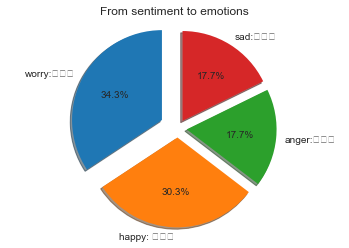

In [45]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('From sentiment to emotions')

plt.show()

# Time Series Analysis:

In [57]:
covidcreat = dfcovid.created_at.dropna()
type(covidcreat)

pandas.core.series.Series

In [73]:
covidcreat111 = pd.DataFrame(covidcreat)

In [75]:
covidcreat111

,created_at
0,Thu Jul 16 23:02:14 +0000 2020
1,Thu Jul 16 23:02:14 +0000 2020
2,Thu Jul 16 23:02:14 +0000 2020
3,Thu Jul 16 23:02:14 +0000 2020
4,Thu Jul 16 23:02:14 +0000 2020
...,...
200295,Fri Jul 17 00:36:33 +0000 2020
200296,Fri Jul 17 00:36:33 +0000 2020
200297,Fri Jul 17 00:36:33 +0000 2020
200298,Fri Jul 17 00:36:33 +0000 2020


In [77]:
from datetime import datetime

In [78]:
def timeconvert(x):
    a = (datetime.strftime(datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y'),'%Y-%m-%d %H:%M:%S'))
    return a


covidcreat1 = covidcreat111.created_at.apply(timeconvert)

In [79]:
covidcreat2 = list(covidcreat1)
#covidcreat2

In [80]:
covidcreat3 = pd.DataFrame(covidcreat2)
covidcreat3.head()

,0
0,2020-07-16 23:02:14
1,2020-07-16 23:02:14
2,2020-07-16 23:02:14
3,2020-07-16 23:02:14
4,2020-07-16 23:02:14


In [81]:
covidcreat4 = covidcreat3.rename(columns={0: "created_at"})
covidcreat4

,created_at
0,2020-07-16 23:02:14
1,2020-07-16 23:02:14
2,2020-07-16 23:02:14
3,2020-07-16 23:02:14
4,2020-07-16 23:02:14
...,...
196369,2020-07-17 00:36:33
196370,2020-07-17 00:36:33
196371,2020-07-17 00:36:33
196372,2020-07-17 00:36:33


In [82]:
covidcreat4['created_at'] = pd.to_datetime(covidcreat4['created_at'], errors='coerce')

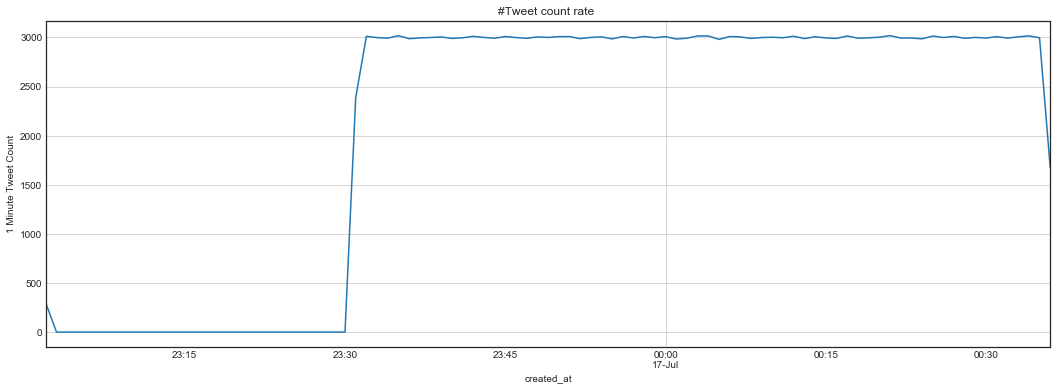

In [83]:
tweet_df_5min = covidcreat4.groupby(pd.Grouper(key='created_at', freq='1Min', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('1 Minute Tweet Count')
plt.title('#Tweet count rate ')
plt.grid(True)


# Pre - Processing 

In [91]:
dftext = dfcovid.text.dropna()

In [92]:
type(dftext)

pandas.core.series.Series

In [93]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

# clean dataframe's text column
dftext = dftext.apply(processTweet)
# preview some cleaned tweets
dftext.head()

0                          they are annoying block the number and comes back from new one hate the ones using your area … 
1                  this morning the young barista woman told that customer came with mask but not wearing when she asked …
2    lindsey graham said 120 000 dead americans would mean that the pandemic had been successfully contained what did lin…
3                                                  one our movement best podcasters amazing patriot with real commitment …
4                                                               you are incorrect about that masks reduce the risk getti… 
Name: text, dtype: object

In [94]:
dftext.iloc[1324]

'all ain’ that bad '

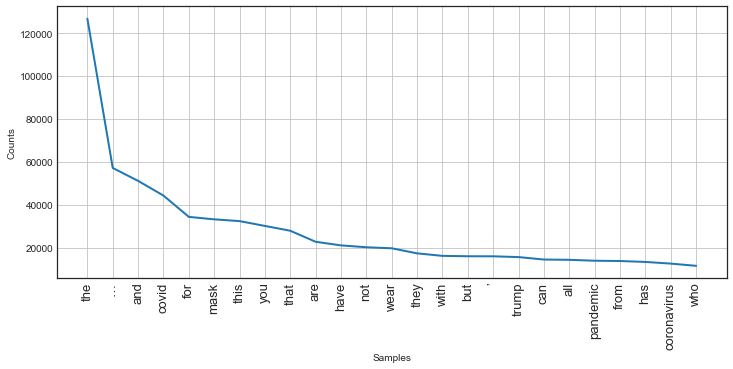

Text(0.5, 0, 'Word Rank')

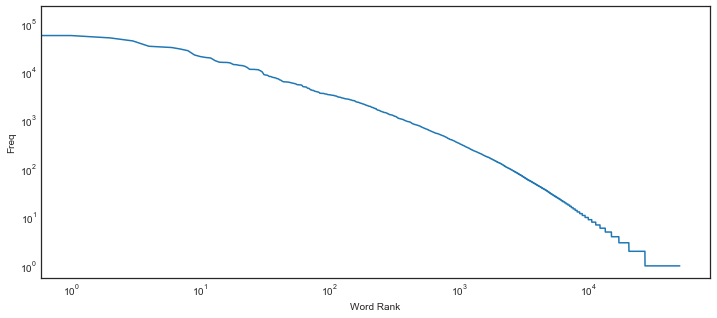

In [95]:
# most common words in twitter dataset
all_words = []
for line in list(dftext):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)

plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [96]:
fd.most_common(10)

[('the', 126744),
 ('…', 57113),
 ('and', 51089),
 ('covid', 44235),
 ('for', 34295),
 ('mask', 33152),
 ('this', 32322),
 ('you', 30070),
 ('that', 27824),
 ('are', 22674)]

In [97]:
# drop duplicates
dfduptext = dftext.drop_duplicates()
dfduptext.shape

(87085,)

In [98]:
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)


("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [99]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]


def remove_words(word_list):
    remove = ['...','“','”','’','…']
    return [w for w in word_list if w not in remove]

# -------------------------------------------

# tokenize message column and create a column for tokens
dfduptext1 = dfduptext.copy()
dftoken1 = dfduptext1.apply(text_process) # tokenize style 1
dftoken2 = dftoken1.apply(remove_words) #tokenize style 2
dftoken2.head()

0                                   [annoying, block, number, comes, back, new, one, hate, ones, using, area]
1                                [morning, young, barista, woman, told, customer, came, mask, wearing, asked]
2    [lindsey, graham, said, 120, 000, dead, americans, would, mean, pandemic, successfully, contained, lin…]
3                                       [one, movement, best, podcasters, amazing, patriot, real, commitment]
4                                                                    [incorrect, masks, reduce, risk, getti…]
Name: text, dtype: object

In [100]:
def remove_words2(word_list):
    remove = ['get','got','new','...','“','”','’','…','one']
    return [w for w in word_list if w not in remove]
dftoken3 = dftoken1.apply(remove_words2) #tokenize style 2

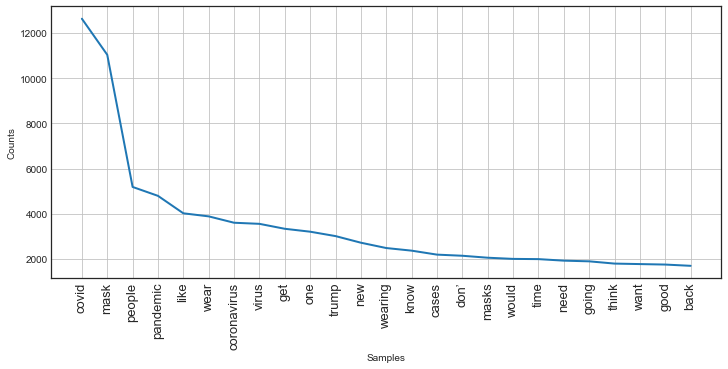

Text(0.5, 0, 'Word Rank')

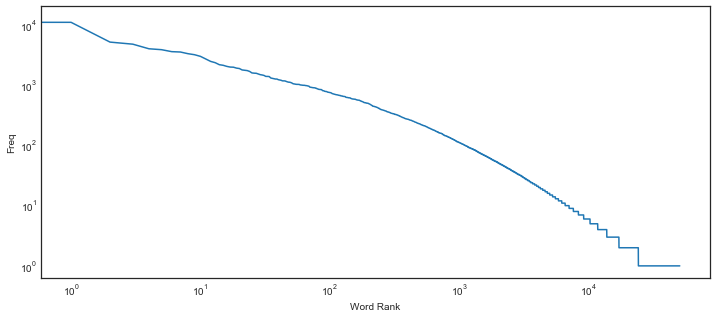

In [101]:
# # most common words in twitter dataset
# all_words = []
# for ls in dftoken1:
#     words = [w for w in ls]
#     for word in words:
#         all_words.append(word.lower())
    
# # plot word frequency distribution of first few words
# plt.figure(figsize=(12,5))
# plt.xticks(fontsize=13, rotation=90)
# fd = nltk.FreqDist(all_words)
# fd.plot(25,cumulative=False)

# # log-log  of all words 
# word_counts = sorted(Counter(all_words).values(), reverse=True)
# plt.figure(figsize=(12,5))
# plt.loglog(word_counts, linestyle='-', linewidth=1.5)
# plt.ylabel("Freq")
# plt.xlabel("Word Rank")

# plot word frequency distribution of first few words without paul, ryan
# no_pauls
no_pauls = []
for ls in dftoken2:
    words = [w for w in ls]
    for word in words:
        no_pauls.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_pauls)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_pauls 
word_counts = sorted(Counter(no_pauls).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [102]:
fd.most_common(10)

[('covid', 12637),
 ('mask', 11039),
 ('people', 5184),
 ('pandemic', 4789),
 ('like', 4016),
 ('wear', 3880),
 ('coronavirus', 3598),
 ('virus', 3549),
 ('get', 3330),
 ('one', 3201)]

# Word Cloud 

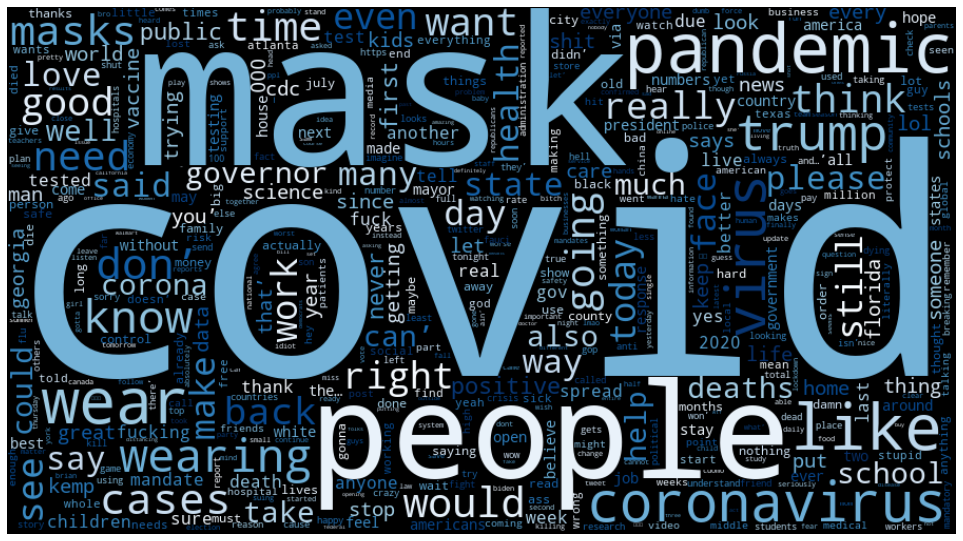

In [103]:
# split sentences to get individual words
all_words = []
for line in dftoken3: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=300,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()